<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Dogs_vs_Cats_tiny_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU Status

In [1]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Import dataset from Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/test_set'

Mounted at /content/drive


# Import libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Creating augmented data generators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Pre-processing data

In [5]:
training_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Model 1 (baseline model)

## Creating baseline model

In [6]:
# create the model 
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [8]:
# fit the model
history_1 = model_1.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 1550s 6s/step - loss: 0.6855 - accuracy: 0.5403 - val_loss: 0.6733 - val_accuracy: 0.5325
Epoch 2/5
251/251 [==============================] - 102s 407ms/step - loss: 0.6577 - accuracy: 0.6002 - val_loss: 0.6575 - val_accuracy: 0.5970
Epoch 3/5
251/251 [==============================] - 75s 298ms/step - loss: 0.6446 - accuracy: 0.6225 - val_loss: 0.6434 - val_accuracy: 0.6210
Epoch 4/5
251/251 [==============================] - 75s 297ms/step - loss: 0.6330 - accuracy: 0.6380 - val_loss: 0.6522 - val_accuracy: 0.6040
Epoch 5/5
251/251 [==============================] - 76s 303ms/step - loss: 0.6239 - accuracy: 0.6519 - val_loss: 0.7804 - val_accuracy: 0.5645


## Plot loss curves

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

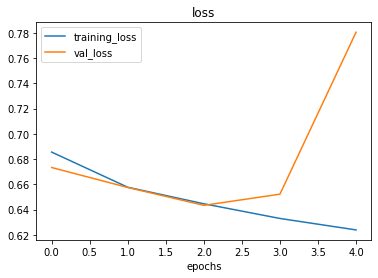

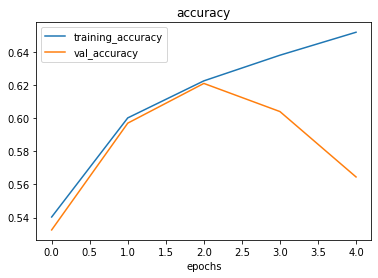

In [10]:
plot_loss_curves(history_1)

## Evaluate baseline model

In [11]:
model_1.evaluate(test_data)

63/63 [==============================] - 11s 171ms/step - loss: 0.7804 - accuracy: 0.5645


[0.7804052233695984, 0.5644999742507935]

# Model 2 - improving the baseline model

Adding more layers (Dense layer with 128 neurons)

## Creating the model 2

In [12]:
# create the model 2
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# compile the model 2
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [14]:
# fit the model 2
history_2 = model_2.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 76s 299ms/step - loss: 0.6874 - accuracy: 0.5506 - val_loss: 0.6656 - val_accuracy: 0.6115
Epoch 2/5
251/251 [==============================] - 74s 294ms/step - loss: 0.6630 - accuracy: 0.6013 - val_loss: 0.6334 - val_accuracy: 0.6390
Epoch 3/5
251/251 [==============================] - 75s 300ms/step - loss: 0.6447 - accuracy: 0.6294 - val_loss: 0.6161 - val_accuracy: 0.6665
Epoch 4/5
251/251 [==============================] - 73s 291ms/step - loss: 0.6233 - accuracy: 0.6539 - val_loss: 0.6126 - val_accuracy: 0.6735
Epoch 5/5
251/251 [==============================] - 73s 294ms/step - loss: 0.6134 - accuracy: 0.6645 - val_loss: 0.5997 - val_accuracy: 0.6765


## Plot loss curves

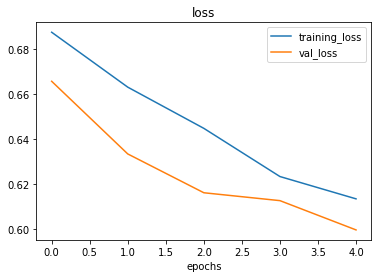

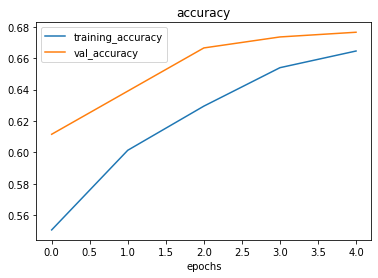

In [15]:
plot_loss_curves(history_2)

## Evaluate the model 2

In [16]:
model_2.evaluate(test_data)

63/63 [==============================] - 11s 172ms/step - loss: 0.5997 - accuracy: 0.6765


[0.5996615886688232, 0.6765000224113464]

# Model 3 - Improvement for the model 2
Adding more filters to the Conv2D layers

## Creating model 3

In [17]:
# create the model 3
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# compile model 3
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [19]:
# fit the model 3
history_3 = model_3.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 77s 303ms/step - loss: 0.6894 - accuracy: 0.5417 - val_loss: 0.6702 - val_accuracy: 0.5610
Epoch 2/5
251/251 [==============================] - 76s 301ms/step - loss: 0.6503 - accuracy: 0.6234 - val_loss: 0.6044 - val_accuracy: 0.6815
Epoch 3/5
251/251 [==============================] - 74s 296ms/step - loss: 0.6136 - accuracy: 0.6650 - val_loss: 0.5889 - val_accuracy: 0.6895
Epoch 4/5
251/251 [==============================] - 75s 300ms/step - loss: 0.6020 - accuracy: 0.6742 - val_loss: 0.5665 - val_accuracy: 0.7190
Epoch 5/5
251/251 [==============================] - 73s 291ms/step - loss: 0.6014 - accuracy: 0.6727 - val_loss: 0.5613 - val_accuracy: 0.7180


## Plot loss curves

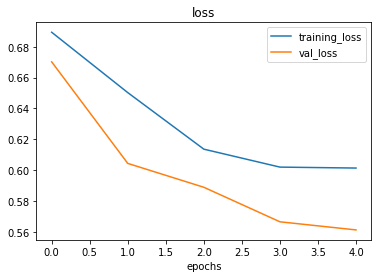

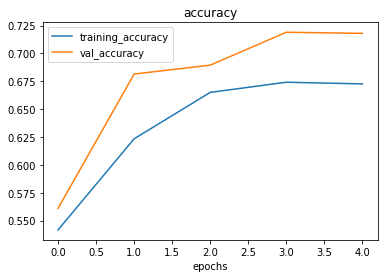

In [20]:
plot_loss_curves(history_3)

## Evaluate the model 3

In [21]:
model_3.evaluate(test_data)

63/63 [==============================] - 11s 168ms/step - loss: 0.5613 - accuracy: 0.7180


[0.5612836480140686, 0.7179999947547913]

# Model 4 - adding more epochs
model 3 seems overfitting therefore adding more epochs to the model.

## creating model 4

In [22]:
# create the model 4
model_4 = tf.keras.models.Sequential()

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Flatten())

model_4.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# compile model 4
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [24]:
# fit the model 4
history_4 = model_4.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 76s 298ms/step - loss: 0.6770 - accuracy: 0.5681 - val_loss: 0.6359 - val_accuracy: 0.6545
Epoch 2/25
251/251 [==============================] - 75s 300ms/step - loss: 0.6424 - accuracy: 0.6262 - val_loss: 0.6388 - val_accuracy: 0.6290
Epoch 3/25
251/251 [==============================] - 74s 293ms/step - loss: 0.6272 - accuracy: 0.6433 - val_loss: 0.6002 - val_accuracy: 0.6745
Epoch 4/25
251/251 [==============================] - 76s 304ms/step - loss: 0.6061 - accuracy: 0.6667 - val_loss: 0.6278 - val_accuracy: 0.6530
Epoch 5/25
251/251 [==============================] - 74s 294ms/step - loss: 0.5932 - accuracy: 0.6787 - val_loss: 0.5589 - val_accuracy: 0.7145
Epoch 6/25
251/251 [==============================] - 74s 296ms/step - loss: 0.5807 - accuracy: 0.6832 - val_loss: 0.5468 - val_accuracy: 0.7300
Epoch 7/25
251/251 [==============================] - 77s 306ms/step - loss: 0.5674 - accuracy: 0.7033 - val_loss: 0.5277 - val_ac

## Plot loss curves

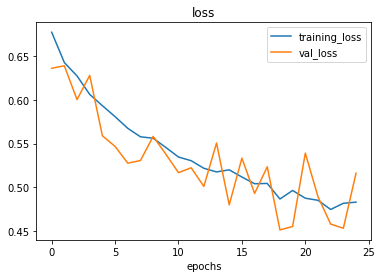

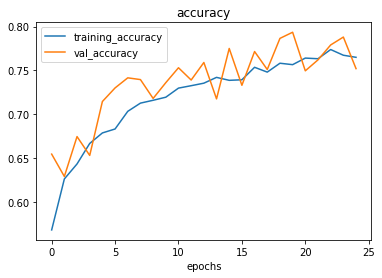

In [25]:
plot_loss_curves(history_4)

##Evaluate model 4

In [26]:
model_4.evaluate(test_data)

63/63 [==============================] - 10s 163ms/step - loss: 0.5162 - accuracy: 0.7520


[0.5161831378936768, 0.7519999742507935]

# Model 5 - Improvment for the model 4
adding more filters to the second Conv2D layer.

## creating model 5

In [27]:
# create the model 5
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [28]:
# compile model 5
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [29]:
# fit the model 5
history_5 = model_5.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 76s 299ms/step - loss: 0.6723 - accuracy: 0.5816 - val_loss: 0.6007 - val_accuracy: 0.6775
Epoch 2/25
251/251 [==============================] - 75s 299ms/step - loss: 0.6285 - accuracy: 0.6438 - val_loss: 0.6141 - val_accuracy: 0.6480
Epoch 3/25
251/251 [==============================] - 75s 299ms/step - loss: 0.6067 - accuracy: 0.6684 - val_loss: 0.7103 - val_accuracy: 0.6270
Epoch 4/25
251/251 [==============================] - 75s 299ms/step - loss: 0.5928 - accuracy: 0.6762 - val_loss: 0.5954 - val_accuracy: 0.6730
Epoch 5/25
251/251 [==============================] - 75s 300ms/step - loss: 0.5770 - accuracy: 0.6990 - val_loss: 0.5323 - val_accuracy: 0.7335
Epoch 6/25
251/251 [==============================] - 74s 296ms/step - loss: 0.5654 - accuracy: 0.7069 - val_loss: 0.5654 - val_accuracy: 0.6990
Epoch 7/25
251/251 [==============================] - 75s 300ms/step - loss: 0.5508 - accuracy: 0.7203 - val_loss: 0.4995 - val_ac

## Plot loss curves

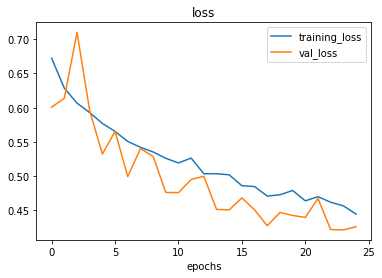

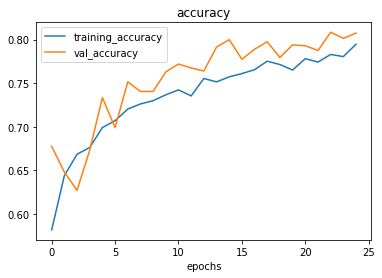

In [30]:
plot_loss_curves(history_5)

## Evaluate model 5

In [31]:
model_5.evaluate(test_data)

63/63 [==============================] - 11s 169ms/step - loss: 0.4261 - accuracy: 0.8075


[0.4261452853679657, 0.8075000047683716]

# Model 6 - Imporvment for model 5
Adding more convolutional and maxpool layer

## Creating the model 6

In [32]:
# create the model 6
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [33]:
# compile model 6
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [34]:
# fit the model 6
history_6 = model_6.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 79s 312ms/step - loss: 0.6763 - accuracy: 0.5657 - val_loss: 0.6681 - val_accuracy: 0.5970
Epoch 2/25
251/251 [==============================] - 79s 314ms/step - loss: 0.6430 - accuracy: 0.6325 - val_loss: 0.6215 - val_accuracy: 0.6565
Epoch 3/25
251/251 [==============================] - 78s 312ms/step - loss: 0.6106 - accuracy: 0.6643 - val_loss: 0.6231 - val_accuracy: 0.6690
Epoch 4/25
251/251 [==============================] - 79s 315ms/step - loss: 0.6029 - accuracy: 0.6742 - val_loss: 0.5687 - val_accuracy: 0.7130
Epoch 5/25
251/251 [==============================] - 79s 316ms/step - loss: 0.5719 - accuracy: 0.7007 - val_loss: 0.5866 - val_accuracy: 0.7090
Epoch 6/25
251/251 [==============================] - 81s 321ms/step - loss: 0.5558 - accuracy: 0.7089 - val_loss: 0.5118 - val_accuracy: 0.7390
Epoch 7/25
251/251 [==============================] - 80s 318ms/step - loss: 0.5448 - accuracy: 0.7239 - val_loss: 0.5256 - val_ac

## Plot loss curves

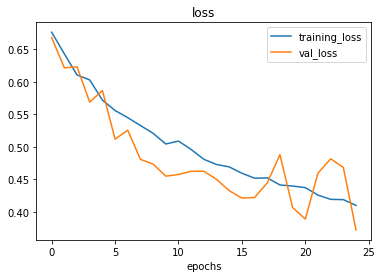

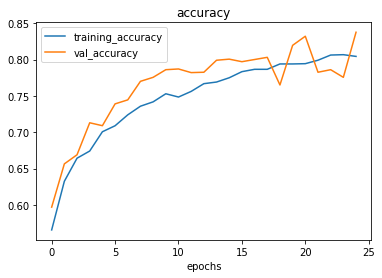

In [35]:
plot_loss_curves(history_6)

## Evaluate the model 6

In [36]:
model_6.evaluate(test_data)

63/63 [==============================] - 11s 169ms/step - loss: 0.3722 - accuracy: 0.8375


[0.37215059995651245, 0.8374999761581421]

# Model 7 - Improvment for the model 6

Adding more conv2d and maxpool layer to the same model structure as model 6

## Creating the model 7

In [37]:
# create the model 7
model_7 = tf.keras.models.Sequential()

model_7.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_7.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_7.add(tf.keras.layers.Flatten())

model_7.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [38]:
# compile model 7
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [39]:
# fit the model 7
history_7 = model_7.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 81s 318ms/step - loss: 0.6903 - accuracy: 0.5298 - val_loss: 0.6823 - val_accuracy: 0.5790
Epoch 2/25
251/251 [==============================] - 78s 312ms/step - loss: 0.6761 - accuracy: 0.5729 - val_loss: 0.6524 - val_accuracy: 0.6165
Epoch 3/25
251/251 [==============================] - 78s 309ms/step - loss: 0.6550 - accuracy: 0.6164 - val_loss: 0.7543 - val_accuracy: 0.5735
Epoch 4/25
251/251 [==============================] - 78s 310ms/step - loss: 0.6402 - accuracy: 0.6293 - val_loss: 0.6139 - val_accuracy: 0.6625
Epoch 5/25
251/251 [==============================] - 79s 314ms/step - loss: 0.6120 - accuracy: 0.6615 - val_loss: 0.5880 - val_accuracy: 0.6805
Epoch 6/25
251/251 [==============================] - 79s 314ms/step - loss: 0.5911 - accuracy: 0.6870 - val_loss: 0.5512 - val_accuracy: 0.7260
Epoch 7/25
251/251 [==============================] - 78s 312ms/step - loss: 0.5821 - accuracy: 0.6904 - val_loss: 0.5498 - val_ac

## Plot loss curves

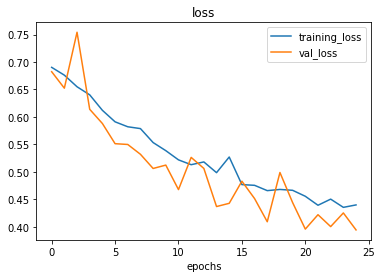

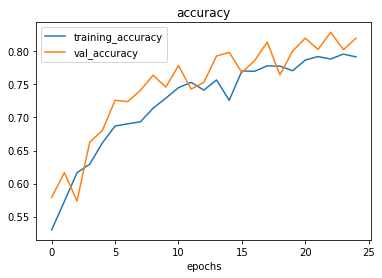

In [40]:
plot_loss_curves(history_7)

## Evaluate the model 7

In [41]:
model_7.evaluate(test_data)

63/63 [==============================] - 11s 170ms/step - loss: 0.3941 - accuracy: 0.8200


[0.3941435217857361, 0.8199999928474426]

# Model 8 - Improvment for the model 7
Addin more 25 epochs to the same model architecture

## Creating the model 8

In [42]:
# create the model 7
model_8 = tf.keras.models.Sequential()

model_8.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_8.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_8.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_8.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_8.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_8.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_8.add(tf.keras.layers.Flatten())

model_8.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [43]:
# compile model 7
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [44]:
# fit the model 7
history_8 = model_8.fit(training_data,
            epochs=50,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/50
251/251 [==============================] - 80s 315ms/step - loss: 0.6900 - accuracy: 0.5256 - val_loss: 0.6709 - val_accuracy: 0.5915
Epoch 2/50
251/251 [==============================] - 78s 311ms/step - loss: 0.6746 - accuracy: 0.5791 - val_loss: 0.6563 - val_accuracy: 0.6065
Epoch 3/50
251/251 [==============================] - 78s 310ms/step - loss: 0.6534 - accuracy: 0.6187 - val_loss: 0.6180 - val_accuracy: 0.6875
Epoch 4/50
251/251 [==============================] - 78s 311ms/step - loss: 0.6282 - accuracy: 0.6508 - val_loss: 0.6613 - val_accuracy: 0.6155
Epoch 5/50
251/251 [==============================] - 77s 308ms/step - loss: 0.6220 - accuracy: 0.6548 - val_loss: 0.5942 - val_accuracy: 0.6920
Epoch 6/50
251/251 [==============================] - 77s 308ms/step - loss: 0.5840 - accuracy: 0.6943 - val_loss: 0.5885 - val_accuracy: 0.6745
Epoch 7/50
251/251 [==============================] - 77s 308ms/step - loss: 0.5670 - accuracy: 0.7039 - val_loss: 0.5237 - val_ac

## Plot loss curves

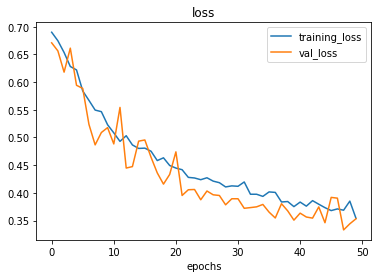

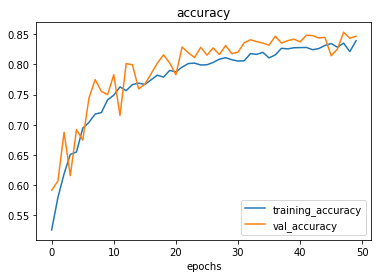

In [45]:
plot_loss_curves(history_8)

## Evaluate the model 8

In [46]:
model_8.evaluate(test_data)

63/63 [==============================] - 11s 176ms/step - loss: 0.3532 - accuracy: 0.8470


[0.35320305824279785, 0.847000002861023]